https://matplotlib.org/3.1.1/gallery/shapes_and_collections/line_collection.html

In [1]:
import os
import numpy as np
import pydicom as dicom
import matplotlib.pyplot as plt

# our imports
import mkViewer2A as mkv
import functions1 as f1
import functions2 as f2

#import imp
#imp.reload(f2)

In [2]:
# setting main paths
adniPth = os.path.join('/','media','mk','p1ext4','no19','adni')
adniMainPth = os.path.join(adniPth, 'ADNI_from_Alexander', 'DownloadedNIfTI')
folder = os.path.join(adniMainPth, 'ADNI')


# There are 4 statistiscs: min, max, mean, std for each 2D slice or the whole 3D array

# Paths to output folders
# There are images inside ; ~170 x 2D DICOM slices are assembled to one 3D NPY array (for each acquisition)
dcm2npyPth = os.path.join(adniMainPth, 'DCM2NPY')  
# There are arrays inside (one for an acquisition); stat. params for each 2D DICOM image (~170 rows x 4 columns)
statslPth = os.path.join(adniMainPth, 'STATSL') 
# There are arrays inside (one for each acquisition); stats for one 3D image (4,)
statim3dPth = os.path.join(adniMainPth, 'STATIM3D') 

# A global variable
PRINT = False

os.chdir(folder)
f1.pthInfo()

Current folder is:
	/media/mk/p1ext4/no19/adni/ADNI_from_Alexander/DownloadedNIfTI/ADNI


In [34]:
# go in a folder
os.chdir(statslPth)
f1.pthInfo()

sl_files = os.listdir('.')
sl_files.sort()
print("All files: %d" % len(sl_files))

Current folder is:
	/media/mk/p1ext4/no19/adni/ADNI_from_Alexander/DownloadedNIfTI/STATSL
All files: 122


In [42]:
aMax = np.zeros((122,220))

for k,f in enumerate(sl_files):
    im = np.load(f)
    slices = im.shape[0]
    aMax[k,:slices] = im[:,1]
    
    


In [43]:
segs = np.zeros((122, 220, 2))
segs[:, :, 1] = aMax
segs[:, :, 0] = np.arange(220)

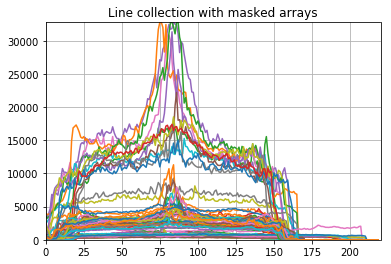

In [76]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
fig, ax = plt.subplots()

ax.set_xlim(0, 220)
ax.set_ylim(0, aMax.max())

colors = [mcolors.to_rgba(c)
          for c in plt.rcParams['axes.prop_cycle'].by_key()['color']]

line_segments = LineCollection(segs, linestyle='solid', colors=colors)
ax.add_collection(line_segments)
ax.set_title('Line collection with masked arrays')
ax.grid(True)
plt.show()

10